In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import oeis

import sys
import sympy
import math
from sympy import *
from sympy.abc import x, n, z, t, k
from sympy.core.cache import *
    
init_printing() # for nice printing, a-la' TeX

sys.setrecursionlimit(100000)

plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [7]:
with assuming(Q.positive(1-x)):
    print(sqrt((1-x)**2))

sqrt((-x + 1)**2)


In [26]:
x = symbols('x', negative=True)
s = sqrt((1-x)**2)
s

-x + 1

---

## $\mathfrak{p}={1^{j+1}0^{j}}$

In [88]:
j_sym = symbols('j', positive=True)
def S(t, j=j_sym):
    #t = symbols('t', positive=True)
    radix_term = sqrt(1-4*t+4*t**(j+1))
    return 2/(radix_term * (1 + radix_term))

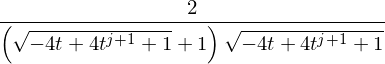

In [89]:
S(t)

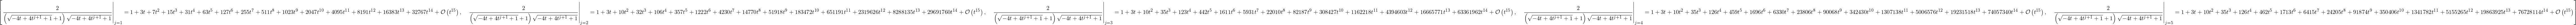

In [94]:
results = [Eq(term, term.doit().series(t, n=15)) 
           for j in range(1, 6) 
           for term in [Subs(S(t), j_sym, j)]]
results

In [103]:
def coeffs(j, results, limit):
    rhs = results[j-1].rhs
    return [rhs.coeff(t, n) for n in range(limit)]

In [104]:
coeffs(3, results, limit=15)

In [105]:
searchable = oeis.oeis_search(seq=coeffs(j=4, results=results, limit=15))
searchable()

*

_Results for query: <a href='https://oeis.org/search?q=1%2C+3%2C+10%2C+35%2C+126%2C+459%2C+1696%2C+6330%2C+23806%2C+90068%2C+342430%2C+1307138%2C+5006576%2C+19231518%2C+74057340&fmt=json&start=0'>https://oeis.org/search?q=1%2C+3%2C+10%2C+35%2C+126%2C+459%2C+1696%2C+6330%2C+23806%2C+90068%2C+342430%2C+1307138%2C+5006576%2C+19231518%2C+74057340&fmt=json&start=0</a>_<br><hr>

---

In [3]:
c = IndexedBase('c')

In [4]:
(1*c[n,4]).args

(c, n, 4)

In [1]:
eqs=Tuple(#Eq(c[0,0],c[3,3]),
      Eq(c[1,0],c[0,0]),
      Eq(c[1,1],c[0,0]),
      Eq(c[2,0],c[1,0]+c[1,1]),
      Eq(c[2,1],c[1,0]+c[1,1]),
      Eq(c[2,2],c[1,1]),
        Eq(c[3,0],c[2,0]+c[2,1]+c[2,2]),
        Eq(c[3,1],c[2,0]+c[2,1]+c[2,2]),
        Eq(c[3,2],c[2,1]+c[2,2]),
        Eq(c[3,3],c[0,0]),
    )
solve(eqs, eqs.atoms(Indexed) )
      #[c[0,0],c[1,0],c[2,0],c[3,0]], check=True)
      #exclude=[c[3,0],c[3,1],c[3,2],c[3,3]], check=True)
      #[c[0,0],c[1,1],c[2,2],c[3,3]])
      #check=True, implicit=True)

NameError: name 'Tuple' is not defined

In [4]:
solve([#Eq(c[0,0],c[3,3]),
      Eq(c[4,0],c[3,0]+c[3,1]+c[3,2]+c[3,3]),
      Eq(c[4,1],c[3,0]+c[3,1]+c[3,2]+c[3,3]),
      Eq(c[4,2],c[3,1]+c[3,2]+c[3,3]),
      Eq(c[4,3],c[3,2]+c[3,3]),
      Eq(c[4,4],c[3,3]),  
    ], check=True
      #[c[0,0],c[1,0],c[2,0],c[3,0]], check=True)
      #exclude=[c[3,0],c[3,1],c[3,2],c[3,3]], check=True)
      #[c[3,0],c[3,1],c[3,2],c[3,3]])
      #check=True, implicit=True)
      )

[{c[3, 0]: c[4, 1] - c[4, 2], c[3, 1]: c[4, 2] - c[4, 3], c[3, 2]: c[4, 3] - c
[4, 4], c[3, 3]: c[4, 4], c[4, 0]: c[4, 1]}]

In [7]:
solve([#Eq(c[0,0],c[3,3]),
      Eq(c[1,0],c[0,0]),
      Eq(c[1,1],c[0,0])
    ], check=True
      #[c[0,0],c[1,0],c[2,0],c[3,0]], check=True)
      #exclude=[c[3,0],c[3,1],c[3,2],c[3,3]], check=True)
      #[c[3,0],c[3,1],c[3,2],c[3,3]])
      #check=True, implicit=True)
      )

[{c[0, 0]: c[1, 1], c[1, 0]: c[1, 1]}]

In [3]:
def catalan_gf(t): return (1-sqrt(1-4*t))/(2*t)

In [5]:
catalan_series = catalan_gf(t).series(t, n=15)

In [6]:
[catalan_series.coeff(t,n=i) for i in range(15)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796, 58786, 208012, 742900, 26744
40]

---

In [3]:
from contextlib import contextmanager

@contextmanager
def bind_Mul_indexed(term, indexed, forbidden_terms=[]):
    coeff_w, ind_w = Wild('coeff', exclude=[indexed] + forbidden_terms), Wild('ind')
    matched = term.match(coeff_w * ind_w)
    # if no indexing happen then isinstance(matched[ind_w], IndexedBase) holds
    if matched and ind_w in matched and isinstance(matched[ind_w], Indexed):
        _, *subscripts = matched[ind_w].args
        yield matched[coeff_w], subscripts
    else:
        raise Exception()
        

f, n, k = IndexedBase('f'), *symbols('n k')
term = 3 * f[n,k]
try:
    with bind_Mul_indexed(term, f) as (coeff, subscripts):
        print('{} * {}'.format(coeff, subscripts))
except Exception:
    print('something else')
    
term

3 * [n, k]


3⋅f[n, k]

In [8]:
n, k = symbols('n k')
i = IndexedBase('i')

In [40]:
a, *b = i.args
a,b

(i, [])

In [16]:
i_w = Wild('i_w')
m = i[n,k].match(i_w)
m[i_w]

i[n, k]

In [27]:
type(i)

sympy.tensor.indexed.IndexedBase

In [22]:
eq = Eq(2**n * k, 111)
k_constraint = Eq(k, 2*t+1)
eq, k_constraint

⎛ n                     ⎞
⎝2 ⋅k = 111, k = 2⋅t + 1⎠

In [23]:
solve([eq, k_constraint], [n,k,t])

⎡⎧                  ⎛  111  ⎞⎫⎤
⎢⎪               log⎜───────⎟⎪⎥
⎢⎨                  ⎝2⋅t + 1⎠⎬⎥
⎢⎪k: 2⋅t + 1, n: ────────────⎪⎥
⎣⎩                  log(2)   ⎭⎦

In [24]:
n_sol = floor(solve(Eq(2**n, 111), n).pop())
n_sol

6

In [29]:
m=(solve(eq.subs(n, n_sol), k).pop())
m

111
───
 64

In [30]:
m.p, m.q

(111, 64)

In [31]:
Mul(2**n_sol*m.q, m.p, evaluate=False)

111⋅4096

In [3]:
divmod(Integer(83726), 8475)

(9, 7451)

In [41]:
def list_to_frac(count, symbol_chr='a', start_index=0):
    l = symbols('{}{}:{}'.format(symbol_chr, start_index, count+start_index))
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1/expr
    return l[0] + expr, l
four_convergent, syms = list_to_frac(4)
four_convergent

          1      
a₀ + ────────────
             1   
     a₁ + ───────
               1 
          a₂ + ──
               a₃

In [45]:
four_convergent.subs(syms[1], 1)

          1     
a₀ + ───────────
            1   
     1 + ───────
              1 
         a₂ + ──
              a₃

In [43]:
symbols('a_{n+1}')

a_{n+1}

In [33]:
@contextmanager
def split_dict(symbols, subs):
    yield (subs[s] for s in symbols)

In [34]:
with split_dict([n,k,t], {k:40, n:39, t:3}) as (x_v, *rest): pass
x_v

39

In [9]:
T = IndexedBase('T')
hanoi_eq = Eq(T[n]+1, 2*T[n-1]+2).factor()
hanoi_eq

T[n] + 1 = 2⋅(T[n - 1] + 1)

the following shows that `subs` doesn't perform *true* pattern matching; on the other hand, `replace` does it since it is possible to use `Wild` object too.

In [10]:
U = IndexedBase('U')
a = Wild('a')
hanoi_eq.subs(T[n]+1, U[n]), hanoi_eq.replace(T[a]+1, U[a])

(U[n] = 2⋅(T[n - 1] + 1), U[n] = 2⋅U[n - 1])

In [14]:
n, m = Wild('n'), Wild('m')
r = Integer(8475).replace(2**n * m, m, map=True)
r

(8475, {})

In [13]:
solve(Equality(k**2, 2*n*log(1/(1-t))), k)[1].simplify()

       ______________
      ╱      ⎛ -1  ⎞ 
√2⋅  ╱  n⋅log⎜─────⎟ 
   ╲╱        ⎝t - 1⎠ 

In [9]:
solve?

In [14]:
17 >> 1

8

In [3]:
a = IndexedBase('a')
eq1 = Eq(a[2], 2+a[1])
eq2 = Eq(a[3], 1+a[1])
eq3 = Eq(3, a[2]+a[3])
solve([eq1, eq2, eq3], [a[1],a[2],a[3],])

{a[1]: 0, a[2]: 2, a[3]: 1}

---

In [20]:
x, y = IndexedBase('x'), IndexedBase('y')

eq_4 = Eq(1, x[2]*y[2])
eq_3 = Eq(0, x[2]*y[1] + x[1]*y[2])
eq_2 = Eq(0, x[2] + x[1]*y[1] + y[2])
eq_1 = Eq(0, x[1] + y[1])
eq_0 = Eq(0, x[0] * y[0])

eqs = [eq_4, eq_3, eq_2, eq_1, eq_0]
eqs

[1 = x[2]⋅y[2], 0 = x[1]⋅y[2] + x[2]⋅y[1], 0 = x[1]⋅y[1] + x[2] + y[2], 0 = x[
1] + y[1], 0 = x[0]⋅y[0]]

In [21]:
solve(eqs, [x[2],x[1], x[0],y[2],y[1],y[0]], )

[{x[0]: 0, x[1]: 0, x[2]: -ⅈ, y[1]: 0, y[2]: ⅈ}, {x[0]: 0, x[1]: 0, x[2]: ⅈ, y
[1]: 0, y[2]: -ⅈ}, {x[0]: 0, x[1]: -√2, x[2]: 1, y[1]: √2, y[2]: 1}, {x[0]: 0,
 x[1]: √2, x[2]: 1, y[1]: -√2, y[2]: 1}, {x[0]: 0, x[1]: -√2⋅ⅈ, x[2]: -1, y[1]
: √2⋅ⅈ, y[2]: -1}, {x[0]: 0, x[1]: √2⋅ⅈ, x[2]: -1, y[1]: -√2⋅ⅈ, y[2]: -1}, {x[
1]: 0, x[2]: -ⅈ, y[0]: 0, y[1]: 0, y[2]: ⅈ}, {x[1]: 0, x[2]: ⅈ, y[0]: 0, y[1]:
 0, y[2]: -ⅈ}, {x[1]: -√2, x[2]: 1, y[0]: 0, y[1]: √2, y[2]: 1}, {x[1]: √2, x[
2]: 1, y[0]: 0, y[1]: -√2, y[2]: 1}, {x[1]: -√2⋅ⅈ, x[2]: -1, y[0]: 0, y[1]: √2
⋅ⅈ, y[2]: -1}, {x[1]: √2⋅ⅈ, x[2]: -1, y[0]: 0, y[1]: -√2⋅ⅈ, y[2]: -1}]